# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

655

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Displaying URL from openweather
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "London").json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 59.43,
  'feels_like': 44.51,
  'temp_min': 57,
  'temp_max': 61,
  'pressure': 1016,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 21.92, 'deg': 70, 'gust': 34.45},
 'clouds': {'all': 0},
 'dt': 1587404386,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1587358394,
  'sunset': 1587409504},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [12]:
# Displaying URL from openweather
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "London").json()
response

# Capture city information
data = []

# set up lists to hold reponse info
city_name = []
cloudiness_data = []
Humidity_data = []
Wind_Speed_data = []
temp_max_data = []
Date_data = []
Country_data = []
Lat_data = []
Long_data = []

# Loop through the list of cities and perform a request for data on each
  #cloudiness, Humidity, Wind_Speed, temp_max, Date, Country, Lat, Long
i = 0
for city in cities:
    response = requests.get(query_url + city).json()
    i= i + 1
    try:
        
        Cloudiness = response["clouds"]["all"]        
        Humidity = response["main"]["humidity"]      
        Wind_Speed = response["wind"]["speed"]
        temp_max = response["main"]["temp_max"]
        Date = response["dt"]
        Country = response["sys"]["country"]
        Lat = response["coord"]["lat"]
        Long = response["coord"]["lon"]
        
        cloudiness_data.append(Cloudiness)
        Humidity_data.append(Humidity)
        Wind_Speed_data.append(Wind_Speed)
        temp_max_data.append(temp_max)
        Date_data.append(Date)
        Country_data.append(Country)
        Lat_data.append(Lat)
        Long_data.append(Long)
        city_name.append(city)
        
        #Print the cities name
        print(f"{i} {city}")
        
        #Create interval of .2 seconds
        time.sleep(.2)
   
    #If city not found then print error message
    except:
        print("City not found")

1 rudnichnyy
2 kapaa
3 yellowknife
4 ulladulla
5 jalu
City not found
7 banugao
8 bambous virieux
9 narsaq
10 atuona
11 banda aceh
12 hermanus
13 jamestown
14 nikolskoye
15 qaqortoq
16 saint-augustin
17 caravelas
18 whitehorse
19 cidreira
20 deputatskiy
21 nanakuli
22 bredasdorp
23 kamaishi
24 cape town
25 leh
26 punta arenas
27 lagoa
28 yaan
29 ayan
City not found
31 coahuayana
32 takoradi
33 rikitea
City not found
35 mataura
36 pemberton
37 castro
38 ancud
39 french harbor
40 port elizabeth
41 montepuez
City not found
43 lebu
City not found
45 tasiilaq
46 padang
47 thompson
48 lompoc
49 ziarat
50 hithadhoo
City not found
52 ushuaia
53 vaini
54 mount isa
55 kodiak
56 airai
City not found
58 port alfred
City not found
60 port blair
61 kununurra
62 tuatapere
63 tabou
64 itarema
65 chuy
66 provideniya
67 gebre guracha
68 barrow
69 ponta do sol
70 constitucion
71 maceio
72 bluff
73 vrangel
74 japura
75 mbandaka
76 talnakh
77 saskylakh
78 vao
79 guerrero negro
80 hay river
81 butaritari
82 

623 pudozh
624 bereda
625 suntar
626 corrales
627 vallenar
628 hambantota
629 viedma
630 florianopolis
631 alugan
632 chivilcoy
633 bud
634 wuwei
635 high level
636 christchurch
637 sioux lookout
638 salalah
639 yulara
640 biak
641 dudinka
642 ulaanbaatar
City not found
644 breves
645 rawson
646 ust-nera
647 olafsvik
648 mangrol
649 aljezur
650 ola
651 tiznit
652 agadez
653 richards bay
654 gold coast
655 carovigno


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#Create new csv with export of city
download_data.to_csv('Download_weather_data.csv')

# create a data frame from city, cloudiness, humidity, wind speed, max temperature, date, country, latitude, longitude
download_data_dict = {
    'city' : city_name,
    'Cloudiness' : cloudiness_data,
    'Humidity': Humidity_data,
    'Wind Speed' : Wind_Speed_data,
    'Temp Max': temp_max_data,
    'Date': Date_data,
    'Country': Country_data,
    'Latitude': Lat_data,
    'Longitude': Long_data}

# Create DataFrame
download_data = pd.DataFrame(download_data_dict)
download_data.head()

,city,Cloudiness,Humidity,Wind Speed,Temp Max,Date,Country,Latitude,Longitude
0,rudnichnyy,88,86,2.73,33.13,1587404682,RU,59.62,52.47
1,kapaa,10,59,3.65,66.00,1587404682,US,22.08,-159.32
2,yellowknife,20,56,10.29,14.00,1587404682,CA,62.46,-114.35
3,ulladulla,54,67,6.93,57.20,1587404463,AU,-35.35,150.47
4,jalu,0,13,15.52,84.34,1587404683,LY,29.03,21.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

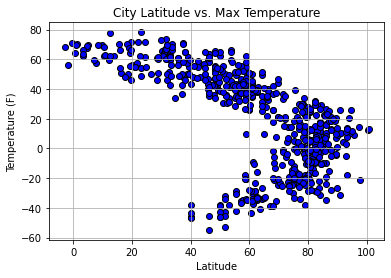

As the latitude increases the weather starts to increase as well


In [34]:
# Build a scatter plot for each data type
plt.scatter(download_data["Temp Max"], download_data["Latitude"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.MaxTemp.png")

# Show plot
plt.show()

print(f"As the latitude increases the weather starts to increase as well")

#### Latitude vs. Humidity Plot

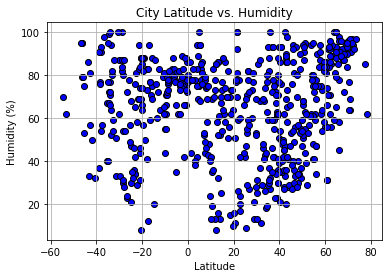

Based on latitude from -60 to 80, the humidity percentage tends to increase


In [35]:
# Build a scatter plot for each data type
plt.scatter(download_data["Latitude"], download_data["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.Humidity.png")

# Show plot
plt.show()

print(f"Based on latitude from -60 to 80, the humidity percentage tends to increase")

#### Latitude vs. Cloudiness Plot

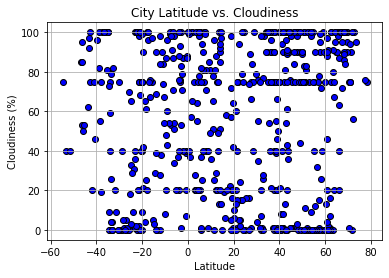

Based on the visualization above, the cloudiness percentage does not actually make a factor with Latitude
There is no increse or decrease in cloudiness based in what city you are in


In [50]:
# Build a scatter plot for each data type
plt.scatter(download_data["Latitude"], download_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.Cloudiness.png")

# Show plot
plt.show()

print(f"Based on the visualization above, the cloudiness percentage does not actually make a factor with Latitude")
print(f"There is no increse or decrease in cloudiness based in what city you are in")

#### Latitude vs. Wind Speed Plot

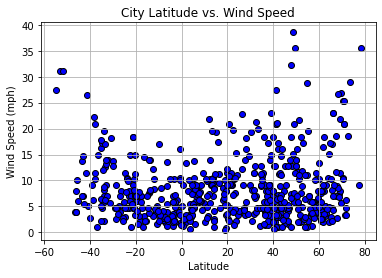

Based on the visualization above, the wind sepped is about the same for all the cities, except a few one
Most of the cities wind speed does not get above 20 mph


In [52]:
# Build a scatter plot for each data type
plt.scatter(download_data["Latitude"], download_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.WindSpeed.png")

# Show plot
plt.show()

print(f"Based on the visualization above, the wind speed is about the same for all the cities, except a few one")
print(f"Most of the cities wind speed does not get above 20 mph")

## Linear Regression

In [14]:
# create a data frame from city, cloudiness, humidity, wind speed, max temperature, date, country, latitude, longitude
download_data_dict = {
    'city' : city_name,
    'Cloudiness' : cloudiness_data,
    'Humidity': Humidity_data,
    'Wind Speed' : Wind_Speed_data,
    'Temp Max': temp_max_data,
    'Date': Date_data,
    'Country': Country_data,
    'Latitude': Lat_data,
    'Longitude': Long_data}

#Create DataFrame
cities_df = pd.DataFrame(download_data_dict)
cities_df.head()

,city,Cloudiness,Humidity,Wind Speed,Temp Max,Date,Country,Latitude,Longitude
0,rudnichnyy,88,86,2.73,33.13,1587404682,RU,59.62,52.47
1,kapaa,10,59,3.65,66.00,1587404682,US,22.08,-159.32
2,yellowknife,20,56,10.29,14.00,1587404682,CA,62.46,-114.35
3,ulladulla,54,67,6.93,57.20,1587404463,AU,-35.35,150.47
4,jalu,0,13,15.52,84.34,1587404683,LY,29.03,21.55


In [26]:
#Define northern and southern hemispheres
northern_hemisphere = cities_df.loc[cities_df["Latitude"] >= 0.0]
northern_hemisphere.reset_index(inplace=True)

southern_hemisphere = cities_df.loc[cities_df["Latitude"] <=0.0]
southern_hemisphere.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

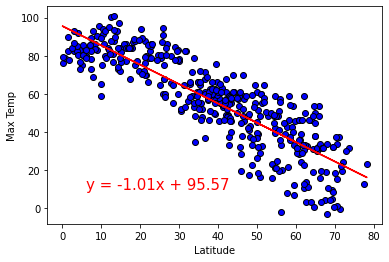

In [49]:
# Creating a scatter plot and adding linear regression and comparing northern hemisphere Max Temp vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Temp Max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("Maxtempvs.latitude.png")

#Show plo
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

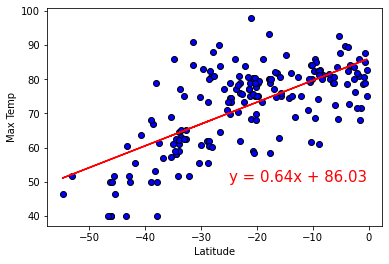

In [42]:
# Creating a scatter plot and adding linear regression and comparing southern hemisphere Max Temp vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Temp Max']

# Formula for slope of a line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("southernMaxtempvs.latitude.png")

#Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

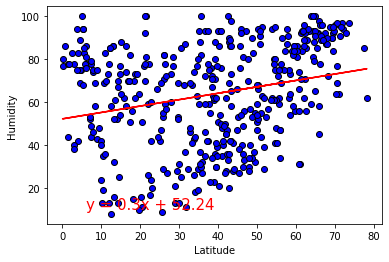

In [48]:
# Creating a scatter plot and adding linear regression and comparing northern hemisphere humidity vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("Humidityvs.latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

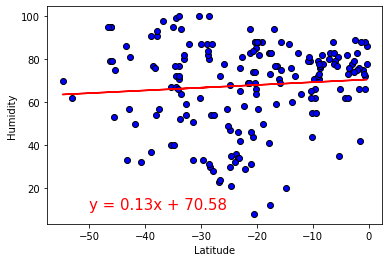

In [37]:
# Creating a scatter plot and adding linear regression and comparing southern hemisphere humidity vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("southern humidity vs.latitude.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

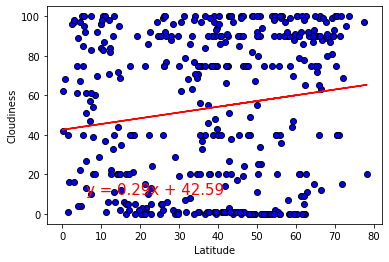

In [46]:
# Creating a scatter plot and adding linear regression and comparing northern hemisphere cloudiness vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("Cloudiness vs.latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

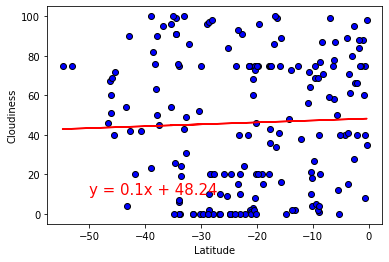

In [43]:
# Creating a scatter plot and adding linear regression and comparing southern cloudiness vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("southern Cloudiness vs.latitude.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

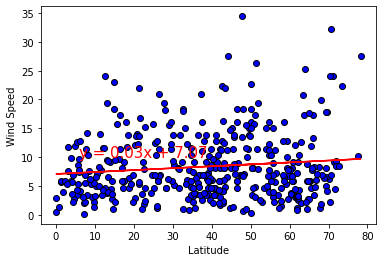

In [44]:
# Creating a scatter plot and adding linear regression and comparing northern hemisphere Wind Speen vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("Wind Speed vs.latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

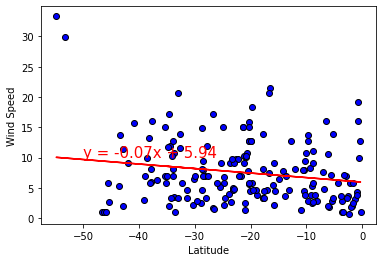

In [50]:
# Creating a scatter plot and adding linear regression and comparing southern hemisphere Wind Speed vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("southern Wind Speed vs.latitude.png")

# Show plot
plt.show()